In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

### Sobre o conjunto de dados Contexto

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever de forma diagnóstica se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade, descendentes dos índios Pima.

Os conjuntos de dados consistem em várias variáveis ​​preditivas médicas e uma variável de destino, Outcome. As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

##### Reconhecimentos
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Usando o algoritmo de aprendizado ADAP para prever o início do diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

##### Inspiração
Você pode construir um modelo de aprendizado de máquina para prever com precisão se os pacientes no conjunto de dados têm ou não diabetes?
#### Sobre este arquivo
Informações sobre atributos do conjunto de dados 

Pregnancies: Para expressar o número de gestações

Glicose: Para expressar o nível de glicose no sangue

BloodPressure: Para expressar a medição da pressão arterial

SkinThickness: Para expressar a espessura da pele

Insulin: Para expressar o nível de insulina no sangue

BMI: Para expressar o índice de massa corporal

DiabetesPedigreeFunction: Para expressar a porcentagem de Diabetes

Age: Para expressar a idade

Outcome: Para expressar o resultado final 1 é Sim e 0 é Não

In [2]:
db1 = pd.read_csv("diabetes.csv")
db1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [266]:
db1.shape

(768, 9)

In [3]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
db1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
db1.duplicated().sum()

0

In [6]:
for c in db1.columns:
    print(f"{c} : {db1[c].nunique()}")

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52
Outcome : 2


In [7]:
db1.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

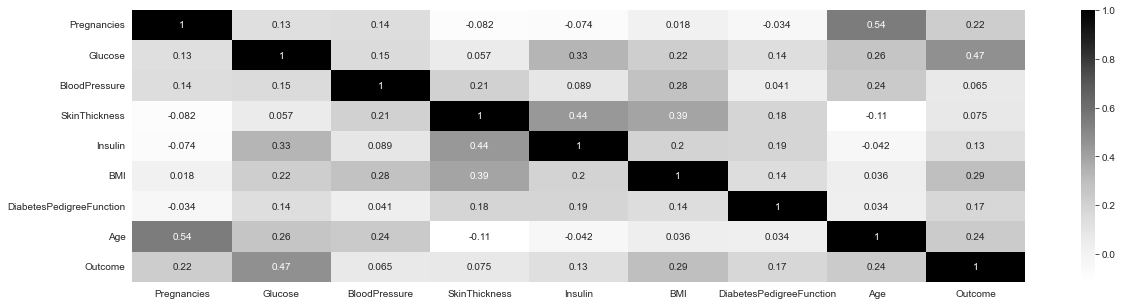

In [8]:
plt.figure(figsize= (20, 5))
sns.heatmap(db1.corr(), annot=True, cmap="Greys")

In [38]:
db1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
for c in db1.columns:
    print(f'Correlação com a coluna : {c}')
    print(db1.corr()[c])
    print()

Correlação com a coluna : Pregnancies
Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
Name: Pregnancies, dtype: float64

Correlação com a coluna : Glucose
Pregnancies                 0.129459
Glucose                     1.000000
BloodPressure               0.152590
SkinThickness               0.057328
Insulin                     0.331357
BMI                         0.221071
DiabetesPedigreeFunction    0.137337
Age                         0.263514
Outcome                     0.466581
Name: Glucose, dtype: float64

Correlação com a coluna : BloodPressure
Pregnancies                 0.141282
Glucose                     0.152590
BloodPressure               1.000000
SkinThickness               0.207371
Insulin 

In [9]:
db1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
var_numerica = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

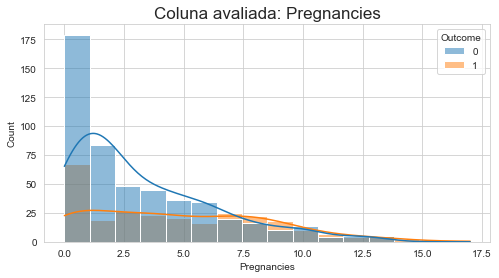

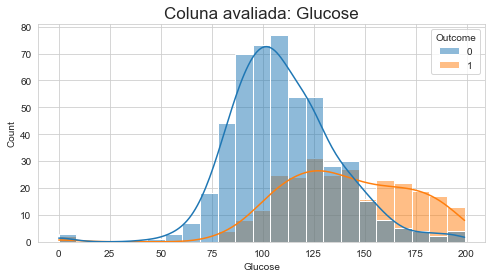

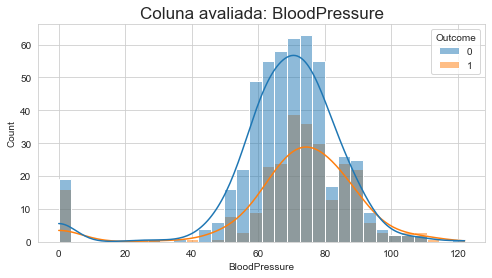

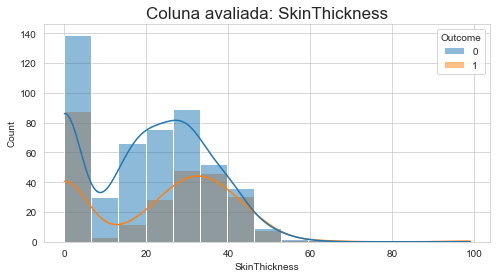

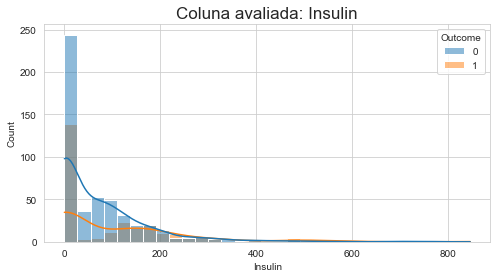

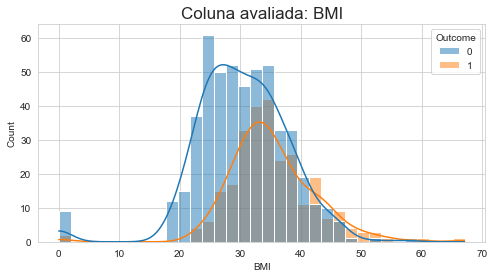

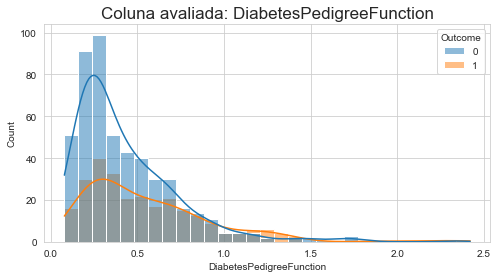

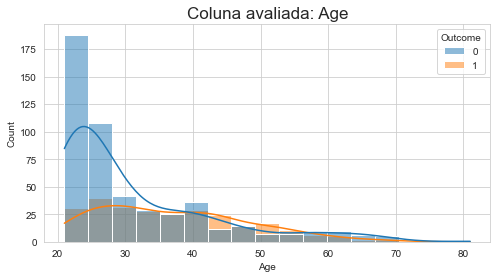

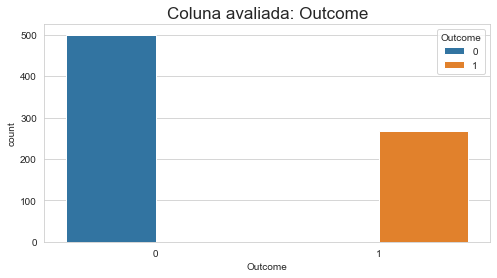

In [18]:
for c in db1.columns:
    plt.figure(figsize=(8, 4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 17)
    if c in var_numerica:
        sns.histplot(x= db1[c], kde=True, hue=db1['Outcome'])
    if c == 'Outcome':
        sns.countplot(x= db1[c], hue= db1['Outcome'])

<AxesSubplot:>

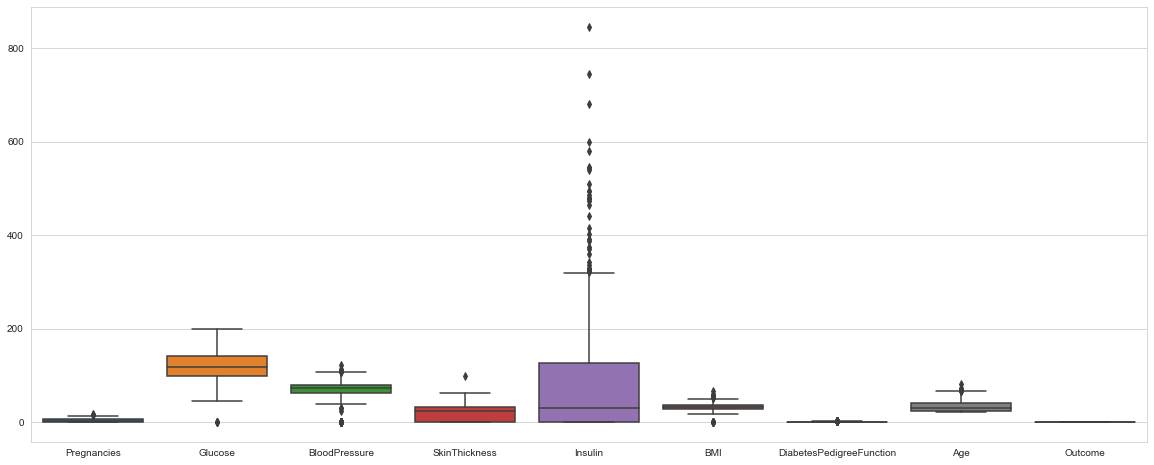

In [44]:
plt.figure(figsize=(20,8))
sns.boxplot(data=db1)

## Parte 2 - removendo Outliers.

In [45]:
db1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [265]:
db1.shape

(768, 9)

### Pregnancies - Removendo Outliers

<AxesSubplot:title={'center':'Pregnancies'}, ylabel='Pregnancies'>

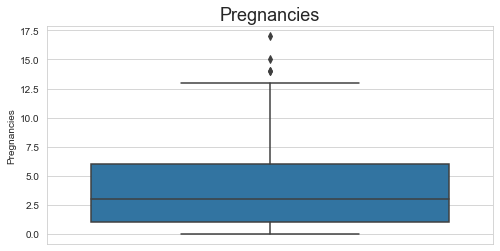

In [54]:
plt.figure(figsize=(8,4))
plt.title("Pregnancies", fontsize = 18)
sns.boxplot(y= db1['Pregnancies'])

In [48]:
db1['Pregnancies'].quantile(0.998)

14.466000000000008

In [50]:
db2 = db1[db1['Pregnancies']< db1['Pregnancies'].quantile(0.998)]

<AxesSubplot:title={'center':'Pregnancies'}, ylabel='Pregnancies'>

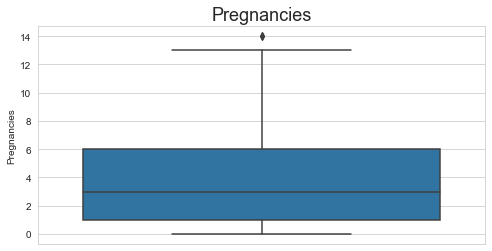

In [55]:
plt.figure(figsize=(8,4))
plt.title("Pregnancies", fontsize = 18)
sns.boxplot(y= db2['Pregnancies'])

In [264]:
db2.shape

(766, 9)

### Glucose - Removendo Outliers

<AxesSubplot:title={'center':'Glucose'}, ylabel='Glucose'>

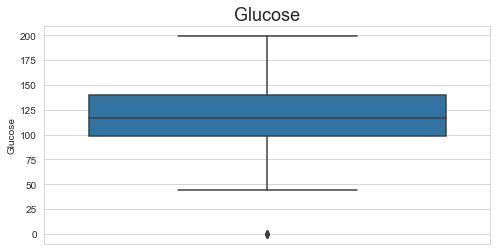

In [61]:
plt.figure(figsize=(8,4))
plt.title("Glucose", fontsize = 18)
sns.boxplot(y= db2['Glucose'])

In [62]:
db2['Glucose'].quantile(0.01)

57.0

In [263]:
db3 = db2[db2['Glucose'] > db2["Glucose"].quantile(0.01)]
db3.shape

(757, 9)

<AxesSubplot:title={'center':'Glucose'}, ylabel='Glucose'>

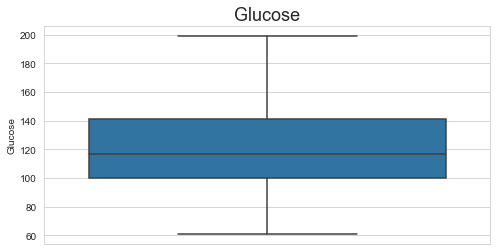

In [65]:
plt.figure(figsize=(8,4))
plt.title("Glucose", fontsize = 18)
sns.boxplot(y= db3['Glucose'])

### BloodPressure - Removendo Outliers

<AxesSubplot:title={'center':'Blood Pressure'}, ylabel='BloodPressure'>

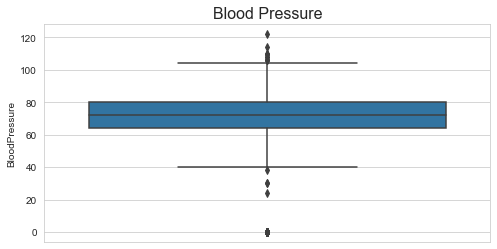

In [69]:
plt.figure(figsize=(8,4))
plt.title("Blood Pressure", fontsize= 16)
sns.boxplot(y=db3['BloodPressure'])

In [76]:
db3['BloodPressure'].quantile(0.01)

0.0

In [77]:
db4 = db3[db3['BloodPressure'] > db3['BloodPressure'].quantile(0.01)]

<AxesSubplot:title={'center':'Blood Pressure'}, ylabel='BloodPressure'>

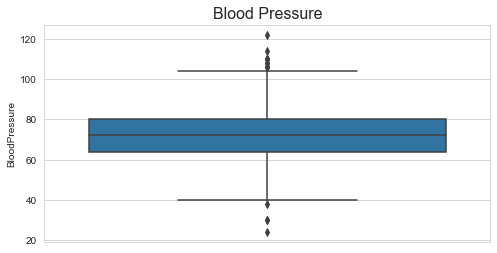

In [78]:
plt.figure(figsize=(8,4))
plt.title("Blood Pressure", fontsize= 16)
sns.boxplot(y=db4['BloodPressure'])

In [262]:
db4.shape

(722, 9)

### SkinThickness - Removendo Outliers

<AxesSubplot:title={'center':'Skin Thickness'}, ylabel='SkinThickness'>

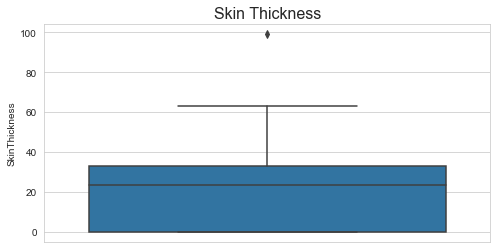

In [82]:
plt.figure(figsize=(8,4))
plt.title("Skin Thickness", fontsize= 16)
sns.boxplot(y=db4['SkinThickness'])

In [87]:
db4['SkinThickness'].quantile(0.9999)

96.40439999999671

In [90]:
db5 = db4[db4['SkinThickness'] < db4['SkinThickness'].quantile(0.9999)]

<AxesSubplot:title={'center':'Skin Thickness'}, ylabel='SkinThickness'>

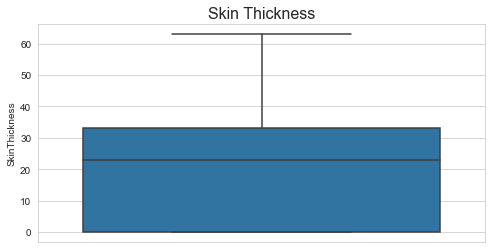

In [91]:
plt.figure(figsize=(8,4))
plt.title("Skin Thickness", fontsize= 16)
sns.boxplot(y=db5['SkinThickness'])

In [261]:
db5.shape

(713, 9)

### Insulin - Removendo Outliers

<AxesSubplot:title={'center':'Insulin'}, ylabel='Insulin'>

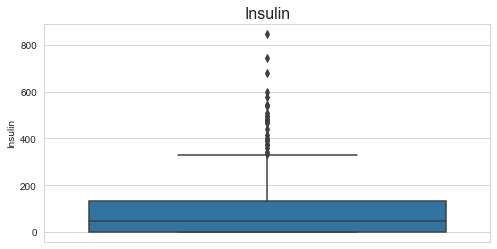

In [95]:
plt.figure(figsize=(8,4))
plt.title("Insulin", fontsize= 16)
sns.boxplot(y=db5['Insulin'])

In [138]:
db5['Insulin'].quantile(0.98)

373.79999999999995

In [141]:
db6 = db5[db5['Insulin'] < db5['Insulin'].quantile(0.98)]

<AxesSubplot:title={'center':'Insulin'}, ylabel='Insulin'>

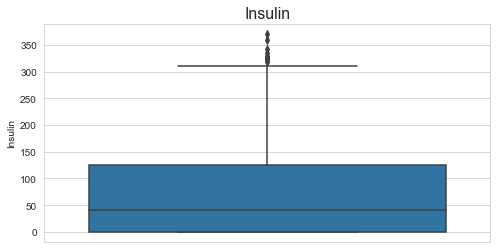

In [142]:
plt.figure(figsize=(8,4))
plt.title("Insulin", fontsize= 16)
sns.boxplot(y=db6['Insulin'])

In [260]:
db6.shape

(698, 9)

### BMI - Removendo Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BMI'}, xlabel='Outcome', ylabel='count'>

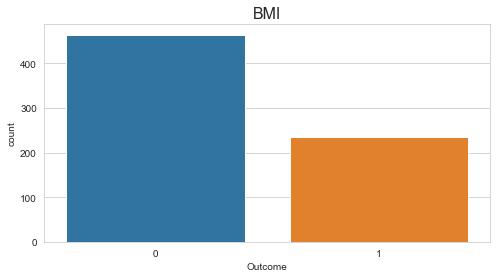

In [206]:
plt.figure(figsize=(8,4))
plt.title("BMI", fontsize= 16)
sns.countplot(db6['Outcome'])


In [184]:
db6['BMI'].quantile(0.01)

18.394

In [185]:
db6['BMI'].quantile(0.99)

49.708999999999996

In [209]:
db7 = db6[(db6['BMI'] > db6['BMI'].quantile(0.01))]

In [259]:
db7.shape

(690, 9)

<AxesSubplot:title={'center':'BMI'}, ylabel='BMI'>

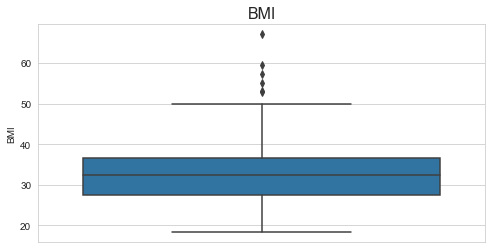

In [211]:
plt.figure(figsize=(8,4))
plt.title("BMI", fontsize= 16)
sns.boxplot(y=db7['BMI'])

In [224]:
 db7["BMI"].quantile(0.999)

61.787000000000454

In [225]:
db7 = db7[db7["BMI"] < db7["BMI"].quantile(0.999)]

In [255]:
db7.shape

(690, 9)

<AxesSubplot:title={'center':'BMI'}, ylabel='BMI'>

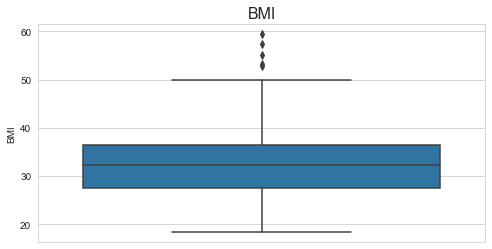

In [227]:
plt.figure(figsize=(8,4))
plt.title("BMI", fontsize= 16)
sns.boxplot(y=db7['BMI'])

### DiabetesPedigreeFunction - Removendo Outliers

Text(0, 0.5, '')

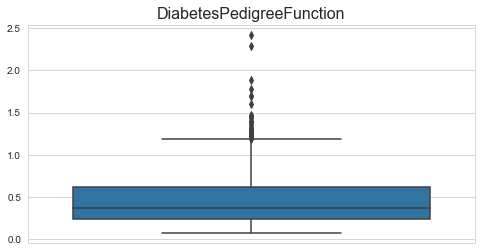

In [231]:
plt.figure(figsize=(8,4))
plt.title("DiabetesPedigreeFunction", fontsize= 16)
sns.boxplot(y=db7['DiabetesPedigreeFunction'])
plt.ylabel("")

In [233]:
 db7["DiabetesPedigreeFunction"].quantile(0.99)

1.4896400000000016

Text(0, 0.5, '')

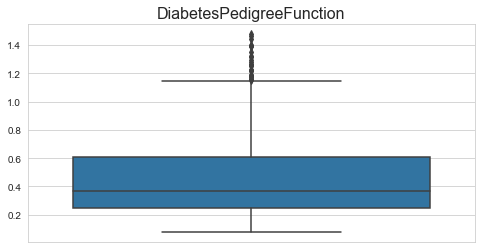

In [235]:
db8 = db7[db7["DiabetesPedigreeFunction"] < db7["DiabetesPedigreeFunction"].quantile(0.99)]
plt.figure(figsize=(8,4))
plt.title("DiabetesPedigreeFunction", fontsize= 16)
sns.boxplot(y=db8['DiabetesPedigreeFunction'])
plt.ylabel("")

In [254]:
db8.shape

(683, 9)

### Age - Removendo Outliers

Text(0, 0.5, '')

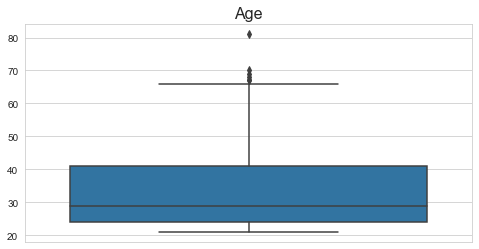

In [282]:
plt.figure(figsize=(8,4))
plt.title("Age", fontsize= 16)
sns.boxplot(y=db8['Age'])
plt.ylabel("")

In [283]:
db8["Age"].quantile(0.999)

73.49800000000107

<AxesSubplot:title={'center':'Age'}>

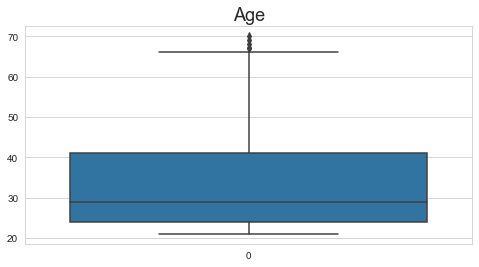

In [284]:
db9 = db8[db8['Age'] < db8['Age'].quantile(0.999)]
plt.figure(figsize=(8,4))
plt.title("Age", fontsize=18)
sns.boxplot(data=db9['Age'])

<AxesSubplot:>

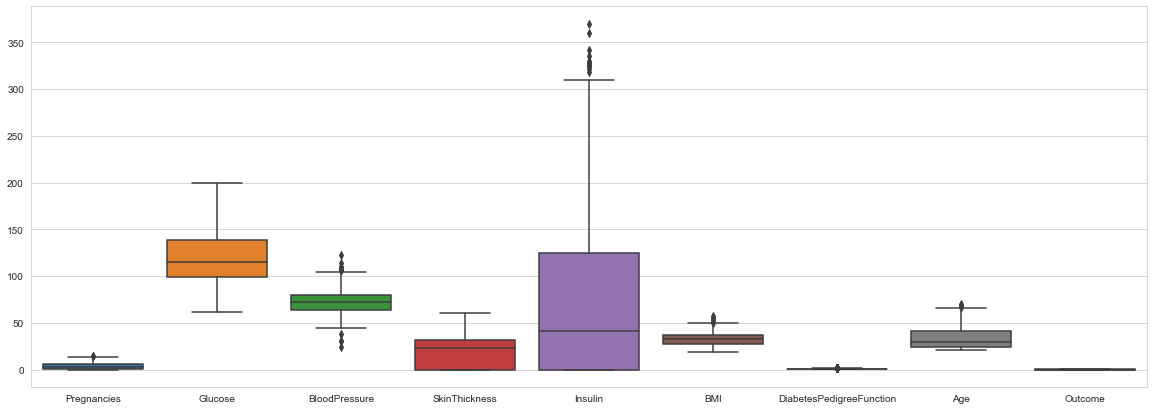

In [285]:
plt.figure(figsize=(20,7))
#plt.title("Age", fontsize=18)
sns.boxplot(data=db9)

In [286]:
db9.shape

(682, 9)

## Comparação entre Dataframes não tratados e tratados.

In [287]:
db1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [288]:
db1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [289]:
db9.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.161983,0.220994,-0.104861,-0.088686,0.027008,0.018826,0.569718,0.231298
Glucose,0.161983,1.000000,0.249711,0.001128,0.240933,0.183675,0.095519,0.287250,0.480701
BloodPressure,0.220994,0.249711,1.000000,0.002043,-0.042081,0.275257,0.042639,0.353653,0.177402
SkinThickness,-0.104861,0.001128,0.002043,1.000000,0.485089,0.381408,0.160223,-0.155144,0.053616
Insulin,-0.088686,0.240933,-0.042081,0.485089,1.000000,0.189034,0.189765,-0.078200,0.117460
BMI,0.027008,0.183675,0.275257,0.381408,0.189034,1.000000,0.126476,0.043568,0.286145
DiabetesPedigreeFunction,0.018826,0.095519,0.042639,0.160223,0.189765,0.126476,1.000000,0.048939,0.199805
Age,0.569718,0.287250,0.353653,-0.155144,-0.078200,0.043568,0.048939,1.000000,0.248613
Outcome,0.231298,0.480701,0.177402,0.053616,0.117460,0.286145,0.199805,0.248613,1.000000


In [290]:
db9.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,3.891496,120.631965,72.565982,20.851906,70.690616,32.348094,0.455818,33.266862,0.335777
std,3.315954,29.456572,12.319387,15.409822,86.468584,6.626743,0.287773,11.558917,0.472608
min,0.000000,61.000000,24.000000,0.000000,0.000000,18.400000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,41.500000,32.250000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.475000,0.605000,41.000000,1.000000
max,14.000000,199.000000,122.000000,60.000000,370.000000,57.300000,1.476000,70.000000,1.000000


In [291]:
db9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [292]:
df = db9
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


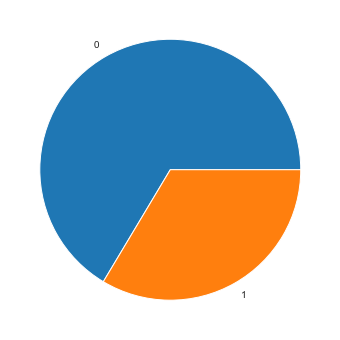

In [293]:
plt.figure(figsize=(10,6))

df.groupby('Outcome').size().plot(kind='pie', ylabel='')
plt.show()

In [321]:
X = df.iloc[ :, 0: -1]

In [324]:
y = df.iloc[:,-1]

In [325]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 682, dtype: int64

In [326]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [327]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [329]:
axu1 = list(X_train.shape)
axu2 = list(X_test.shape)
aux3 = list(y_train.shape)
aux4 = list(y_test.shape)
print(f'X traino : ', axu1)
print(f'X Teste : ', axu2)
print(f'Y traino : ', aux3)
print(f'Y Teste : ',aux4)

X traino :  [477, 8]
X Teste :  [205, 8]
Y traino :  [477]
Y Teste :  [205]


In [330]:
from sklearn.ensemble import RandomForestClassifier # Deu certo
from sklearn.tree import DecisionTreeClassifier # Deu certo

In [332]:
mod_RFC = RandomForestClassifier()
mod_RFC.fit(X_train,y_train)
acuracia = round(mod_RFC.score(X_train, y_train) * 100, 2)
train_pred_RFC = model_selection.cross_val_predict(RandomForestClassifier(), X_train, y_train, cv = 10, n_jobs = -1)
acuracia_vc = round(metrics.accuracy_score(y_train, train_pred_RFC) * 100, 2)
print(f'Acurácia: {acuracia} %')
print(f'Acurácia validação Cruzada : {acuracia_vc} %')

Acurácia: 100.0 %
Acurácia validação Cruzada : 78.62 %


In [333]:
acuracia = round(mod_RFC.score(X_test, y_test) * 100, 2)
print(f'Acurácia: {acuracia} %')

Acurácia: 75.61 %


In [350]:
mod_RFC.score(X_train, y_train)

1.0

In [351]:
mod_RFC.score(X_test, y_test)

0.7560975609756098

In [340]:
from sklearn.tree import DecisionTreeClassifier

In [341]:
mod_DC = DecisionTreeClassifier()
mod_DC.fit(X_train,y_train)
acuracia_DC = round(mod_DC.score(X_train, y_train) * 100, 2)
train_pred_DC = model_selection.cross_val_predict(DecisionTreeClassifier(), X_train, y_train, cv = 11, n_jobs = -1)
acuracia_vc_DC = round(metrics.accuracy_score(y_train, train_pred_DC) * 100, 2)

print(f'Acurácia: {acuracia_DC} %')
print(f'Acurácia validação Cruzada : {acuracia_vc_DC} %')


Acurácia: 100.0 %
Acurácia validação Cruzada : 68.13 %


In [342]:
acuracia_DC = round(mod_DC.score(X_test, y_test) * 100, 2)
print(f'Acurácia: {acuracia_DC} %')

Acurácia: 69.76 %


In [343]:
from sklearn.linear_model import LogisticRegression

In [346]:
mod_Log = LogisticRegression(max_iter=1000)

In [347]:
mod_Log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [348]:
mod_Log.score(X_train, y_train)

0.790356394129979

In [349]:
mod_Log.score(X_test,y_test)

0.7853658536585366